In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
raw_data = pd.read_excel('csvs/titanic.xls')

raw_data['sex'] = raw_data['sex'].apply(lambda x: 1 if x == 'female' else 0)
raw_data[:5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# not null값 제거
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   int64  
 1   survived   1045 non-null   int64  
 2   name       1045 non-null   object 
 3   sex        1045 non-null   int64  
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   int64  
 6   parch      1045 non-null   int64  
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 122.5+ KB


In [155]:
# 형변환
x_data = raw_data.values[:, [0, 3, 4, 8]].astype(float)
y_data = raw_data.values[:, [1]].astype(float)

X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    stratify=y_data,
                                                    test_size=0.1)


def Count(obj):

    ObjUniqueCount = np.unique(obj, return_counts=True)
    print(ObjUniqueCount[1][0] / sum(ObjUniqueCount[1]),
          ObjUniqueCount[1][1] / sum(ObjUniqueCount[1]))


Count(y_train)
Count(y_test)

0.5914893617021276 0.4085106382978723
0.5904761904761905 0.4095238095238095


In [156]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/200
 1/30 [>.............................] - ETA: 6s - loss: 0.2422 - accuracy: 0.7188 - mse: 0.2422
Epoch 1: saving model to ./mpg/model/all\001-0.8095.hdf5
30/30 [==============================] - 0s 6ms/step - loss: 0.2060 - accuracy: 0.7383 - mse: 0.2060 - val_loss: 0.1764 - val_accuracy: 0.8095 - val_mse: 0.1764
Epoch 2/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1863 - accuracy: 0.7812 - mse: 0.1863
Epoch 2: saving model to ./mpg/model/all\002-0.7905.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.7798 - mse: 0.1627 - val_loss: 0.1584 - val_accuracy: 0.7905 - val_mse: 0.1584
Epoch 3/200
 1/30 [>.............................] - ETA: 0s - loss: 0.2444 - accuracy: 0.5938 - mse: 0.2444
Epoch 3: saving model to ./mpg/model/all\003-0.7905.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.7787 - mse: 0.1525 - val_loss: 0.1545 - val_accuracy: 0.7905 - val_mse: 0.1545
Epoch 4/200
 1/30 [

Epoch 26/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1470 - accuracy: 0.7500 - mse: 0.1470
Epoch 26: saving model to ./mpg/model/all\026-0.7810.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.8021 - mse: 0.1405 - val_loss: 0.1436 - val_accuracy: 0.7810 - val_mse: 0.1436
Epoch 27/200
 1/30 [>.............................] - ETA: 0s - loss: 0.2203 - accuracy: 0.6875 - mse: 0.2203
Epoch 27: saving model to ./mpg/model/all\027-0.8286.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1400 - accuracy: 0.8000 - mse: 0.1400 - val_loss: 0.1435 - val_accuracy: 0.8286 - val_mse: 0.1435
Epoch 28/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1041 - accuracy: 0.9062 - mse: 0.1041
Epoch 28: saving model to ./mpg/model/all\028-0.8286.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.7872 - mse: 0.1420 - val_loss: 0.1421 - val_accuracy: 0.8286 - val_mse: 0.1421
Epoch 29/200


Epoch 51/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1388 - accuracy: 0.7812 - mse: 0.1388
Epoch 51: saving model to ./mpg/model/all\051-0.8000.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 0.8011 - mse: 0.1387 - val_loss: 0.1449 - val_accuracy: 0.8000 - val_mse: 0.1449
Epoch 52/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1584 - accuracy: 0.7812 - mse: 0.1584
Epoch 52: saving model to ./mpg/model/all\052-0.8000.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.8064 - mse: 0.1399 - val_loss: 0.1417 - val_accuracy: 0.8000 - val_mse: 0.1417
Epoch 53/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1229 - accuracy: 0.8438 - mse: 0.1229
Epoch 53: saving model to ./mpg/model/all\053-0.8286.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.8021 - mse: 0.1385 - val_loss: 0.1415 - val_accuracy: 0.8286 - val_mse: 0.1415
Epoch 54/200


Epoch 76/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1352 - accuracy: 0.8750 - mse: 0.1352
Epoch 76: saving model to ./mpg/model/all\076-0.8286.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.1388 - accuracy: 0.8106 - mse: 0.1388 - val_loss: 0.1414 - val_accuracy: 0.8286 - val_mse: 0.1414
Epoch 77/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1354 - accuracy: 0.7812 - mse: 0.1354
Epoch 77: saving model to ./mpg/model/all\077-0.8000.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1380 - accuracy: 0.7968 - mse: 0.1380 - val_loss: 0.1424 - val_accuracy: 0.8000 - val_mse: 0.1424
Epoch 78/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1178 - accuracy: 0.8125 - mse: 0.1178
Epoch 78: saving model to ./mpg/model/all\078-0.7905.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.8064 - mse: 0.1367 - val_loss: 0.1416 - val_accuracy: 0.7905 - val_mse: 0.1416
Epoch 79/200


Epoch 101/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1279 - accuracy: 0.8125 - mse: 0.1279
Epoch 101: saving model to ./mpg/model/all\101-0.8000.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1358 - accuracy: 0.7957 - mse: 0.1358 - val_loss: 0.1400 - val_accuracy: 0.8000 - val_mse: 0.1400
Epoch 102/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1365 - accuracy: 0.8438 - mse: 0.1365
Epoch 102: saving model to ./mpg/model/all\102-0.8190.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.8000 - mse: 0.1365 - val_loss: 0.1396 - val_accuracy: 0.8190 - val_mse: 0.1396
Epoch 103/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1084 - accuracy: 0.8750 - mse: 0.1084
Epoch 103: saving model to ./mpg/model/all\103-0.7905.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1360 - accuracy: 0.8074 - mse: 0.1360 - val_loss: 0.1395 - val_accuracy: 0.7905 - val_mse: 0.1395
Epoch 1

Epoch 126/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1867 - accuracy: 0.7500 - mse: 0.1867
Epoch 126: saving model to ./mpg/model/all\126-0.7905.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.8000 - mse: 0.1346 - val_loss: 0.1393 - val_accuracy: 0.7905 - val_mse: 0.1393
Epoch 127/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1376 - accuracy: 0.7500 - mse: 0.1376
Epoch 127: saving model to ./mpg/model/all\127-0.7905.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.8011 - mse: 0.1343 - val_loss: 0.1396 - val_accuracy: 0.7905 - val_mse: 0.1396
Epoch 128/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1319 - accuracy: 0.7500 - mse: 0.1319
Epoch 128: saving model to ./mpg/model/all\128-0.7905.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.1343 - accuracy: 0.8074 - mse: 0.1343 - val_loss: 0.1393 - val_accuracy: 0.7905 - val_mse: 0.1393
Epoch 1

Epoch 151/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1323 - accuracy: 0.7812 - mse: 0.1323
Epoch 151: saving model to ./mpg/model/all\151-0.8000.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.8106 - mse: 0.1335 - val_loss: 0.1389 - val_accuracy: 0.8000 - val_mse: 0.1389
Epoch 152/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1296 - accuracy: 0.8438 - mse: 0.1296
Epoch 152: saving model to ./mpg/model/all\152-0.7714.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.8021 - mse: 0.1327 - val_loss: 0.1392 - val_accuracy: 0.7714 - val_mse: 0.1392
Epoch 153/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1319 - accuracy: 0.8438 - mse: 0.1319
Epoch 153: saving model to ./mpg/model/all\153-0.8190.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1328 - accuracy: 0.8160 - mse: 0.1328 - val_loss: 0.1385 - val_accuracy: 0.8190 - val_mse: 0.1385
Epoch 1

Epoch 176/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1800 - accuracy: 0.7812 - mse: 0.1800
Epoch 176: saving model to ./mpg/model/all\176-0.7905.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1318 - accuracy: 0.8245 - mse: 0.1318 - val_loss: 0.1369 - val_accuracy: 0.7905 - val_mse: 0.1369
Epoch 177/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1006 - accuracy: 0.7812 - mse: 0.1006
Epoch 177: saving model to ./mpg/model/all\177-0.7810.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.8181 - mse: 0.1316 - val_loss: 0.1382 - val_accuracy: 0.7810 - val_mse: 0.1382
Epoch 178/200
 1/30 [>.............................] - ETA: 0s - loss: 0.1730 - accuracy: 0.8125 - mse: 0.1730
Epoch 178: saving model to ./mpg/model/all\178-0.8190.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 0.1319 - accuracy: 0.8255 - mse: 0.1319 - val_loss: 0.1404 - val_accuracy: 0.8190 - val_mse: 0.1404
Epoch 1

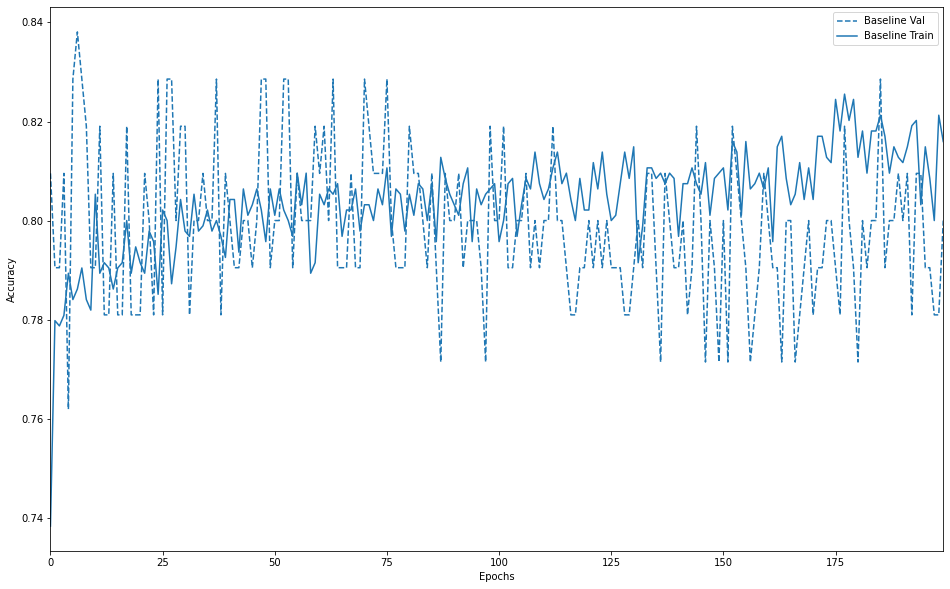

In [160]:
model = Sequential()
model.add(Dense(255, input_shape=(4, ), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='Adam', metrics=['accuracy', 'mse'])

modelpath = "./mpg/model/all/{epoch:03d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

model_history = model.fit(
    X_train,
    y_train,
    epochs=200,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer]
)

plot_history([('baseline', model_history)])

In [125]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch,
                       history.history['val_' + key],
                       '--',
                       label=name.title() + ' Val')
        plt.plot(history.epoch,
                 history.history[key],
                 color=val[0].get_color(),
                 label=name.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['figure.facecolor'] = 'white'

In [158]:
from glob import glob

tmp_array = []
filelist = glob('./mpg/model/all/*.hdf5')
for path in filelist:
    tmp = path.split('\\')[1]
    tmp = tmp.split('-')[1]
    tmp = tmp.split('.hdf5')[0]
    tmp_array.append(float(tmp))
    
model_path = './mpg/model/all/081-' + str(max(tmp_array)) + '.hdf5'

In [159]:
my_model = tf.keras.models.load_model(model_path)
my_model.evaluate(X_test, y_test)

./mpg/model/all/081-0.8571.hdf5
4/4 [==============================] - 0s 1ms/step - loss: 0.1381 - accuracy: 0.8095 - mse: 0.1381


[0.1381179839372635, 0.8095238208770752, 0.1381179839372635]